# El Juego de la Vida de Conway

Cada celda puede estar viva o muerta. Este será el estado de la celda. Cada celda tiene ocho celdas vecinas.

Todas las celdas evolucionan al mismo tiempo según tres reglas:

* Una celda viva con 2 o 3 celdas vecinas vivas sigue viva.
* Una celda muerta con exactamente 3 celdas vecinas vivas se convierte en una celda viva.
* En los demás casos las celdas mueren o siguen muertas.

Referencias: 

* Wikipedia https://es.wikipedia.org/wiki/Juego_de_la_vida

* Desarrollo en Python https://jakevdp.github.io/blog/2013/08/07/conways-game-of-life/


### Ejercicio:

1. Correr el código para ver la evolución de una barra.
2. En las condiciones iniciales activar el deslizador (removiendo el hashtag "\#")
3. Aumentar el tamaño del universo
4. Añadir más elementos al universo
5. Aumentar el tiempo de evolución

In [ ]:
# Ejecutar solo la primera vez.

%pylab inline
import matplotlib.animation

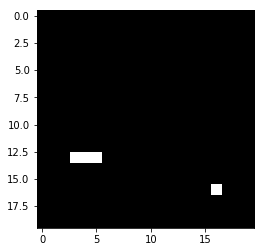

In [2]:
# Esta celda de código define las condiciones iniciales.

# Tamaño del mundo
#   N x N píxeles.
N = 20

matrix = zeros([N,N])

# Una barra que gira
matrix[13,3] = 1
matrix[13,4] = 1
matrix[13,5] = 1

# Un cuadrito solito
matrix[16,16] = 1


# Un deslizador
#matrix[4,4] = 1
#matrix[4,5] = 1
#matrix[4,6] = 1
#matrix[3,6] = 1
#matrix[2,5] = 1

imshow(matrix, cmap="gray")

In [ ]:
# Esta celda de código evoluciona el sistema

# Crear una lista de imágenes
imagelist = []

# Colocar el primer elemento: el estado inicial 
imagelist.append(matrix[:])


# Tiempo total del universo
T = 10


for t in range(T):
    
    nueva_matrix = zeros([N,N])
    
    for i in range(N):
        for j in range(N):

            I = i+1
            if(I == N):
                I = 0
            
            J = j+1
            if(J == N):
                J = 0

            estado = matrix[i,j]
            vecinos_vivos = (matrix[i-1,j-1] + matrix[i,j-1] + matrix[I,j-1] + 
                             matrix[i-1,j]                   + matrix[I,j] + 
                             matrix[i-1,J] + matrix[i,J] + matrix[I,J])

            if ((estado==1) and ((vecinos_vivos == 2) or ( vecinos_vivos == 3))):
                nuevo_estado = 1
            else: 
                if ( (estado==0) and (vecinos_vivos == 3)):
                    nuevo_estado = 1
                else: 
                    nuevo_estado = 0

            nueva_matrix[i,j] = nuevo_estado
    
    # Cambiar al nuevo 
    matrix = nueva_matrix[:]
    imagelist.append(matrix[:])            


In [ ]:
# Esta celda de código grafica y genera la animación.

%matplotlib tk

fig = plt.figure(figsize=([7,7])) # make figure

# make axesimage object
# the vmin and vmax here are very important to get the color map correct
im = plt.imshow(imagelist[0], cmap=plt.get_cmap('gray'), vmin=0, vmax=1)


# function to update figure
def updatefig(j):
    # set the data in the axesimage object
    plt.title("Tiempo = "+str(j))
    im.set_array(imagelist[j])
    # return the artists set
    return [im]
# kick off the animation
ani = matplotlib.animation.FuncAnimation(fig, updatefig, frames=range(T), 
                              interval=250, blit=False)
